In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ctrgb2/img7.png
/kaggle/input/ctrgb2/img11.png
/kaggle/input/ctrgb2/img6.png
/kaggle/input/ctrgb2/img1.png
/kaggle/input/ctrgb2/img4.png
/kaggle/input/ctrgb2/img2.png
/kaggle/input/ctrgb2/img10.png
/kaggle/input/ctrgb2/img13.png
/kaggle/input/ctrgb2/img3.png
/kaggle/input/ctrgb2/img14.png
/kaggle/input/ctrgb2/img9.png
/kaggle/input/ctrgb2/img5.png
/kaggle/input/ctrgb2/img8.png
/kaggle/input/ctrgb2/img12.png
/kaggle/input/ctrgb2/img15.png
/kaggle/input/datasetfast/halfdata/sources.txt
/kaggle/input/datasetfast/halfdata/images/testB/mri1608.jpg
/kaggle/input/datasetfast/halfdata/images/testB/mri1589.jpg
/kaggle/input/datasetfast/halfdata/images/testB/mri750.jpg
/kaggle/input/datasetfast/halfdata/images/testB/mri1628.jpg
/kaggle/input/datasetfast/halfdata/images/testB/mri2288.jpg
/kaggle/input/datasetfast/halfdata/images/testB/mri328.jpg
/kaggle/input/datasetfast/halfdata/images/testB/mri969.jpg
/kaggle/input/datasetfast/halfdata/images/testB/mri310.jpg
/kaggle/input/dataset

In [2]:
! nvidia-smi

Sat May 22 15:44:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.06    Driver Version: 450.51.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:


!pip uninstall torch --y
!pip uninstall torchvision --y
!pip uninstall fastai --y



Found existing installation: torch 1.7.0
Uninstalling torch-1.7.0:
  Successfully uninstalled torch-1.7.0
Found existing installation: torchvision 0.8.1
Uninstalling torchvision-0.8.1:
  Successfully uninstalled torchvision-0.8.1
Found existing installation: fastai 2.3.0
Uninstalling fastai-2.3.0:
  Successfully uninstalled fastai-2.3.0


In [4]:
!pip install -q torch==1.6.0+cu101 
!pip install -q fastai    

ERROR: Could not find a version that satisfies the requirement torch==1.6.0+cu101
ERROR: No matching distribution found for torch==1.6.0+cu101


In [5]:
import torch
print(torch.__version__)

1.8.1+cu102


In [6]:
-use-feature=2020-resolver

SyntaxError: can't assign to operator (<ipython-input-6-eaddb0525e34>, line 1)

In [7]:
!which fastai

In [8]:
import fastai

In [9]:
from fastai.vision.all import *

In [10]:
fastai.__version__

'2.3.1'

In [11]:


!pip install -q git+https://github.com/tmabraham/UPIT.git



In [12]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import glob
import tqdm
import os
import PIL
from fastai.vision.all import *
from fastai.basics import *
from upit.models.cyclegan import *
from upit.inference.cyclegan import *
from upit.train.cyclegan import *
from upit.data.unpaired import *

In [13]:
import os
import sys
import gc
from PIL import Image as immg
import shutil

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:


path = Path('../input/datasetfast/halfdata/images');
for p in path.ls():
    print(p)



../input/datasetfast/halfdata/images/testB
../input/datasetfast/halfdata/images/testA
../input/datasetfast/halfdata/images/trainB
../input/datasetfast/halfdata/images/trainA


In [16]:
ct=path/'trainA'
mri=path/'trainB'

In [17]:


ct_files = get_image_files(ct)
mri_files = get_image_files(mri)

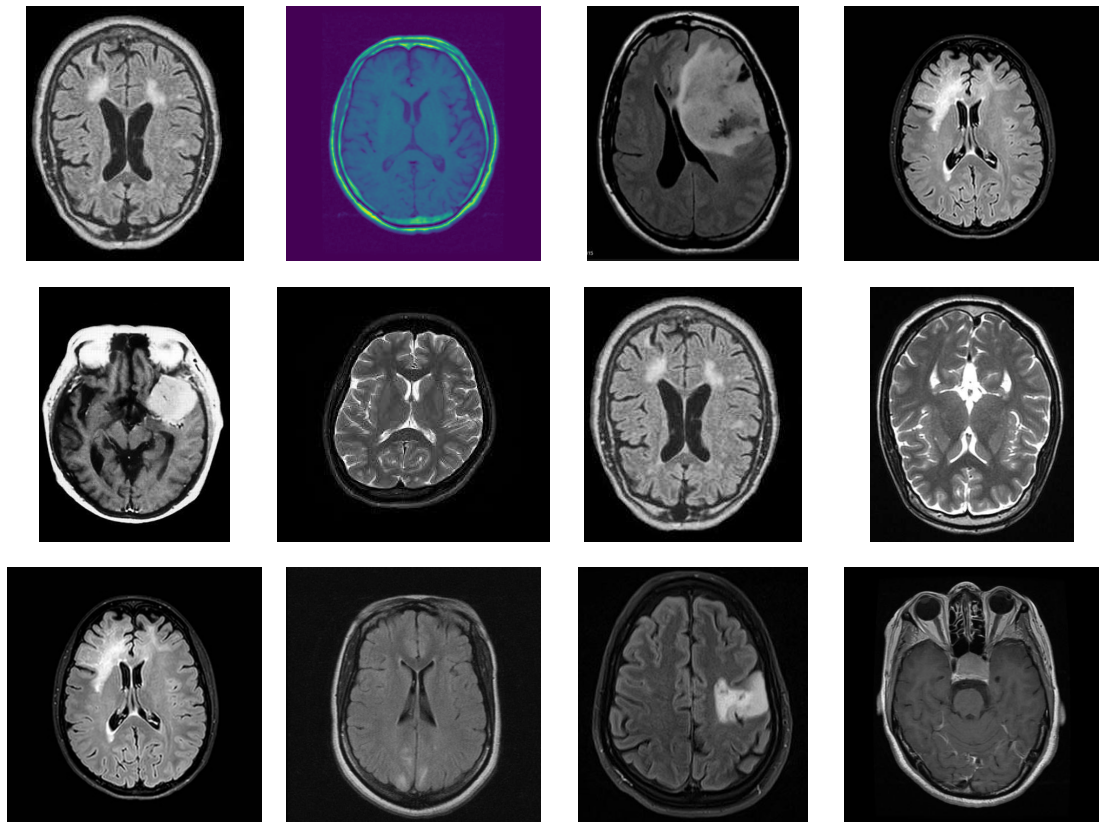

In [18]:
fig = plt.figure(1,figsize=(20,15))
columns = 4
rows = 3
for i in range(rows*columns):
    num = random.randint(2,300)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(immg.open(mri_files[num]))
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()

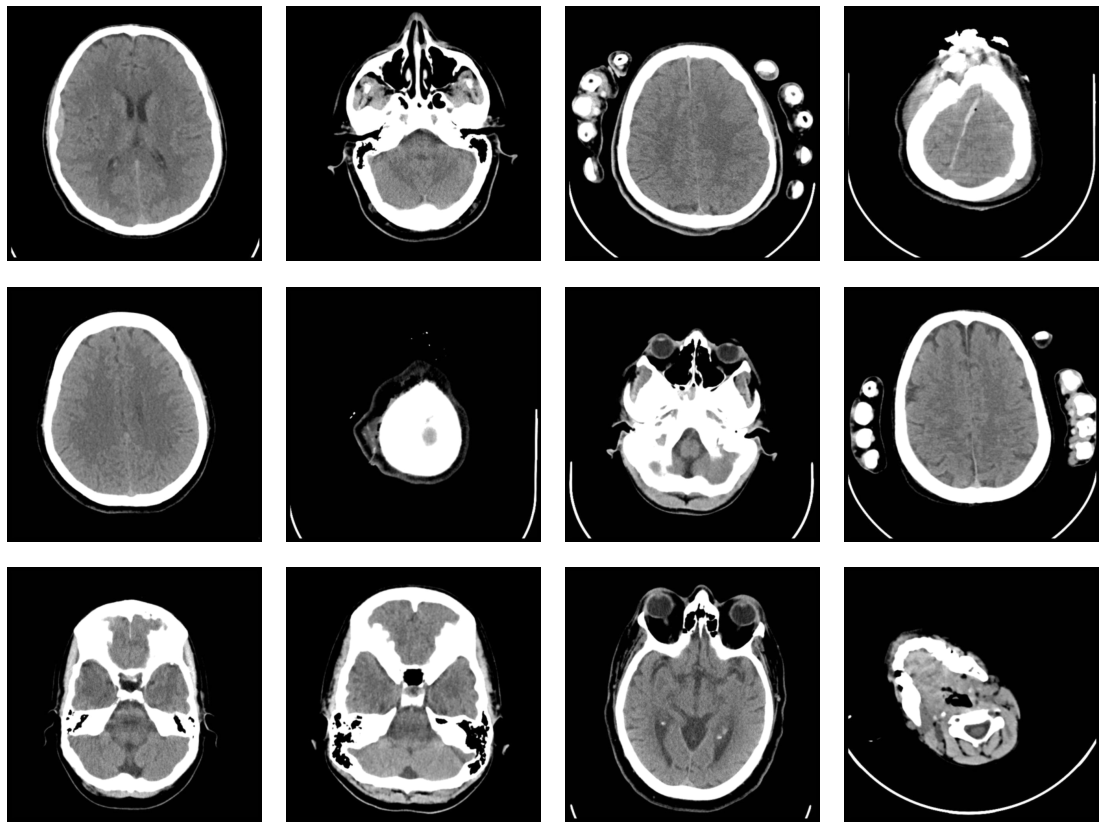

In [19]:
fig = plt.figure(1,figsize=(20,15))
columns = 4
rows = 3
for i in range(rows*columns):
    num = random.randint(2,300)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(immg.open(ct_files[num]),cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()

In [20]:
path2= Path('../input/datasetfast/halfdata/images/trainA');
for p in path2.ls():
    print(p)


../input/datasetfast/halfdata/images/trainA/ct1151.png
../input/datasetfast/halfdata/images/trainA/ct1365.png
../input/datasetfast/halfdata/images/trainA/ct2336.png
../input/datasetfast/halfdata/images/trainA/ct934.png
../input/datasetfast/halfdata/images/trainA/ct2035.png
../input/datasetfast/halfdata/images/trainA/ct2377.png
../input/datasetfast/halfdata/images/trainA/ct2322.png
../input/datasetfast/halfdata/images/trainA/ct482.png
../input/datasetfast/halfdata/images/trainA/ct1453.png
../input/datasetfast/halfdata/images/trainA/ct1003.png
../input/datasetfast/halfdata/images/trainA/ct1957.png
../input/datasetfast/halfdata/images/trainA/ct711.png
../input/datasetfast/halfdata/images/trainA/ct1397.png
../input/datasetfast/halfdata/images/trainA/ct1393.png
../input/datasetfast/halfdata/images/trainA/ct2114.png
../input/datasetfast/halfdata/images/trainA/ct481.png
../input/datasetfast/halfdata/images/trainA/ct307.png
../input/datasetfast/halfdata/images/trainA/ct1471.png
../input/datase

In [21]:
dls = get_dls( ct , mri ,load_size=256,crop_size=256)


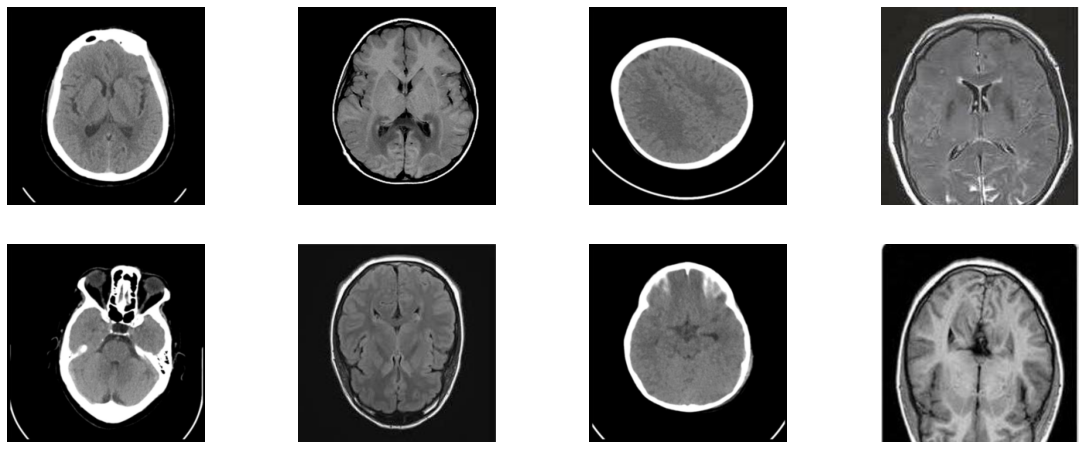

In [22]:


dls.show_batch(figsize=(20,8))



In [23]:


cycle_gan = CycleGAN(3,3,64, gen_blocks=9)
learn = cycle_learner(dls, cycle_gan,opt_func=partial(Adam,mom=0.5,sqr_mom=0.999))



SuggestedLRs(lr_min=0.00012022644514217973, lr_steep=7.585775892948732e-05)

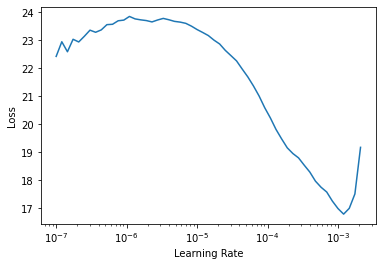

In [24]:


learn.lr_find()



In [25]:


gc.collect()



11305

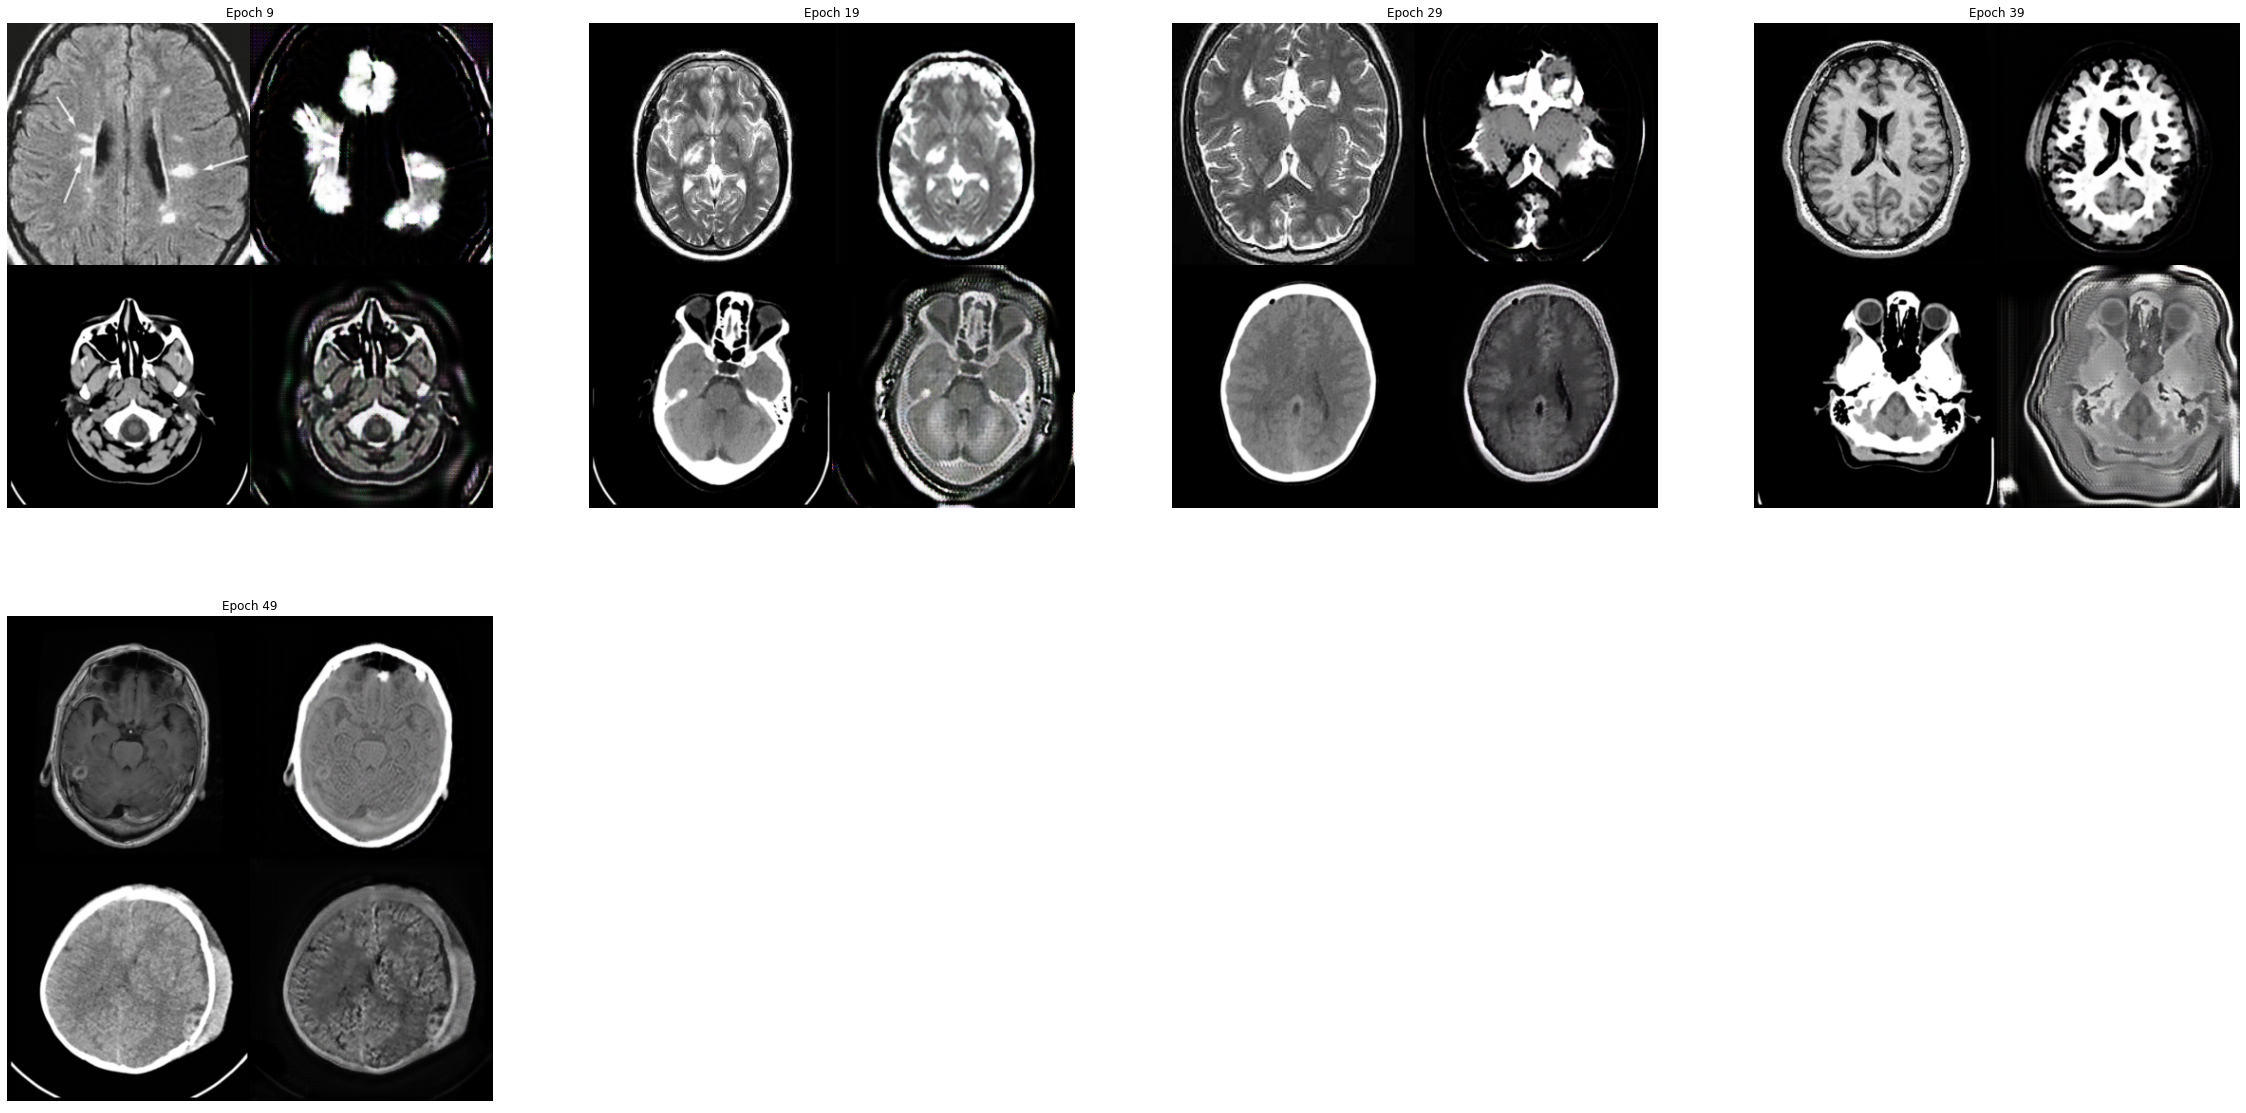

In [26]:


learn.fit_flat_lin(25 ,25 ,1e-4)



In [27]:
learn.save('ct2mri');

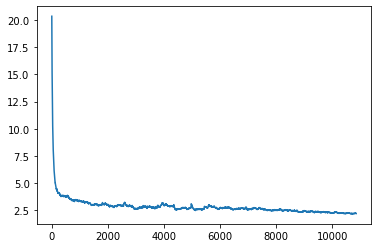

In [28]:
learn.recorder.plot_loss(with_valid=False)

In [29]:


b = dls.train.one_batch()
_,_,preds = learn.get_preds(dl=[b], with_decoded=True)



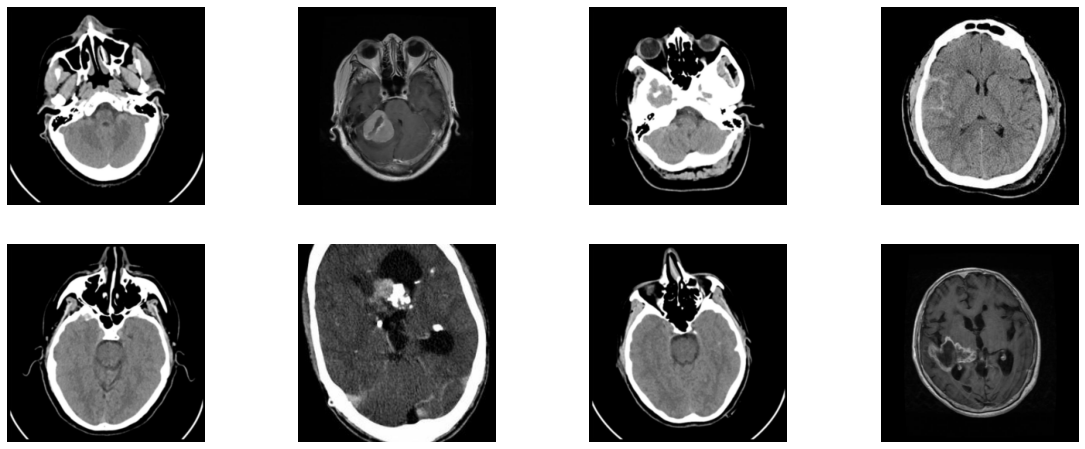

In [30]:


dls.show_batch((b[0], b[1]), max_n=8, show=True,figsize=(20,8))



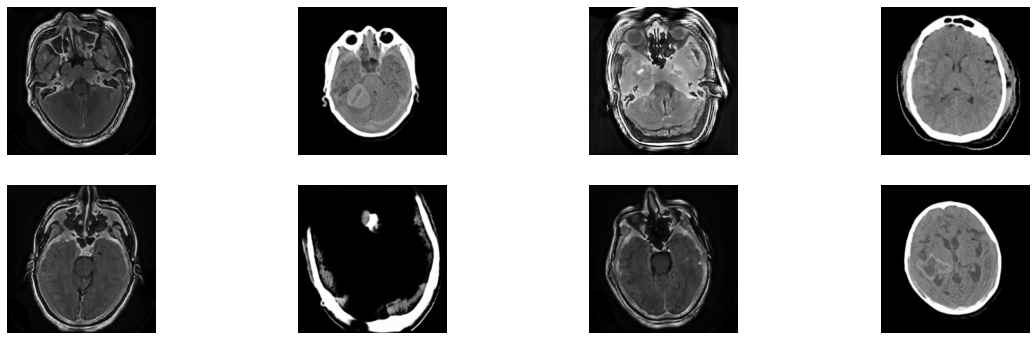

In [31]:


dls.show_batch((preds[1],preds[0]), max_n=8, show=True,figsize=(20,6))



In [32]:
os.mkdir('/kaggle/working/images')


In [33]:
pred_path = '/kaggle/working/images'


In [34]:
test_path = '../input/ctrgb2'

In [35]:
def get_preds_cycleGAN2(learn,test_path,pred_path,bs=4,num_workers=4,suffix='png'):
    """
    A prediction function that takes the Learner object `learn` with the trained model, 
    the `test_path` folder with the images to perform batch inference on, 
    and the output folder `pred_path` where the predictions will be saved, 
    with a batch size `bs`, `num_workers`,
    and suffix of the prediction images `suffix` (default='png').
    """

    assert os.path.exists(test_path)

    if not os.path.exists(pred_path):
        os.mkdir(pred_path)

    test_dl = load_dataset2(test_path,bs,num_workers)
    model = learn.model.G_B.cuda()
    for i, xb in tqdm.tqdm(enumerate(test_dl),total=len(test_dl)):
        fn, im = xb
        preds = (model(im.cuda())/2 + 0.5)
        for i in range(len(fn)):
            new_fn = os.path.join(pred_path,'.'.join([os.path.basename(fn[i]).split('.')[0]+'',suffix]))
            torchvision.utils.save_image(preds[i],new_fn)

In [36]:


get_preds_cycleGAN2(learn,test_path,pred_path,suffix='png')



NameError: name 'load_dataset2' is not defined

In [37]:
os.path.exists(test_path)

True

In [38]:
os.path.exists(pred_path)

True

In [39]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

NameError: name 'transforms' is not defined

In [40]:
def load_dataset2(test_path,bs=4,num_workers=4):
    "A helper function for getting a DataLoader for images in the folder `test_path`, with batch size `bs`, and number of workers `num_workers`"
    dataset = FolderDataset(
            path=test_path,
      transforms=[torchvision.transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))]
            
        )
    loader = torch.utils.data.DataLoader(
            dataset,
            batch_size=bs,
            num_workers=num_workers,
            shuffle=True
        )
    return loader

In [41]:
def get_preds_cyclegan2(learn,test_path,pred_path,convert_to='B',bs=4,num_workers=4,device='cuda',suffix='png'):
    """
    A prediction function that takes the Learner object `learn` with the trained model, the `test_path` folder with the images to perform
    batch inference on, and the output folder `pred_path` where the predictions will be saved. The function will convert images to the domain
    specified by `convert_to` (default is 'B'). The other arguments are the batch size `bs` (default=4), `num_workers` (default=4), the `device`
    to run inference on (default='cuda') and suffix of the prediction images `suffix` (default='tif').
    """

    assert os.path.exists(test_path)

    if not os.path.exists(pred_path):
        os.mkdir(pred_path)

    test_dl = load_dataset2(test_path,bs,num_workers)
    if convert_to=='B': model = learn.model.G_B.to(device)
    else:               model = learn.model.G_A.to(device)
    for i, xb in progress_bar(enumerate(test_dl),total=len(test_dl)):
        fn, im = xb
        preds = (model(im.to(device))/2 + 0.5)
        for i in range(len(fn)):
            new_fn = os.path.join(pred_path,'.'.join([os.path.basename(fn[i]).split('.')[0]+f'_fake{convert_to}',suffix]))
            torchvision.utils.save_image(preds[i],new_fn)

In [42]:
from torchvision import transforms

In [43]:
ls img*

ls: cannot access 'img*': No such file or directory


In [44]:
gc.collect()

44394

In [45]:
learn.export()

AttributeError: Can't pickle local object 'CycleGANLoss._create_gan_loss.<locals>.gan_loss_func'

In [46]:


shutil.make_archive('images','zip','/kaggle/working/images')



'/kaggle/working/images.zip'

In [47]:


ts = get_image_files(pred_path);



IndexError: list index out of range

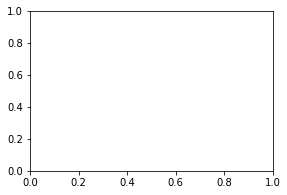

In [48]:


fig = plt.figure(1,figsize=(20,10))
columns = 4
rows = 3
for i in range(rows*columns):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(immg.open(ts[i]))
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.show()



In [49]:
for j in range(len(ts)):
    os.remove(str(ts[j]))
os.remove('/kaggle/working/models/ct2mri.pth')
os.rmdir('/kaggle/working/images')
os.rmdir('/kaggle/working/models')

In [50]:
patho = Path('/kaggle/working/images')
for p in patho.ls():
    print(p)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/images'

In [51]:
!unzip images.zip

Archive:  images.zip
warning [images.zip]:  zipfile is empty


In [52]:
show_image('img1.png')

IndexError: tuple index out of range

In [53]:
ls

__notebook__.ipynb  export.pkl  images.zip
